<a href="https://colab.research.google.com/github/Eyad-dev/UK_Train_Rides/blob/main/(Forecasting).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

df = pd.read_csv("Depi project railway.csv")

#Set "Date of Journey" column into date&time format
df["Date of Journey"] = pd.to_datetime(df["Date of Journey"], format="%m/%d/%Y")

#  Rides prediction
# ---------------------------------

# Sorting dates
# Groups the date by order and then sums up the count of rides for each one of these days
daily_rides = df.groupby("Date of Journey").size().reset_index(name="Rides")

# Create a numpy array and name it "DayIndex"
daily_rides["DayIndex"] = np.arange(len(daily_rides))

#set variable X to a 2D array and store days indexing in it
#so 0->29
X = daily_rides["DayIndex"].values.reshape(-1, 1)

#Holds the number of rides
y = daily_rides["Rides"].values


# Train the model
ride_model = LinearRegression()
ride_model.fit(X, y)

# Forecast for next 30 days
future_days = 30
last_index = daily_rides["DayIndex"].iloc[-1]
future_indices = np.arange(last_index + 1, last_index + future_days + 1).reshape(-1, 1)

#Get predicition for the 30 days
ride_forecast = ride_model.predict(future_indices)

# Create forecast dataframe
future_dates = pd.date_range(
    start=daily_rides["Date of Journey"].iloc[-1] + pd.Timedelta(days=1),
    periods=future_days
)
#This is the formatting of how the output will be displayed
forecast_rides_df = pd.DataFrame({
    "Date": future_dates,
    "Predicted Rides": ride_forecast
})
#Printing the prediction
print("Predicted rides for the following 30 days")
print(forecast_rides_df)

Predicted rides for the following 30 days
         Date  Predicted Rides
0  2024-05-01       265.965702
1  2024-05-02       266.037353
2  2024-05-03       266.109003
3  2024-05-04       266.180653
4  2024-05-05       266.252303
5  2024-05-06       266.323953
6  2024-05-07       266.395604
7  2024-05-08       266.467254
8  2024-05-09       266.538904
9  2024-05-10       266.610554
10 2024-05-11       266.682204
11 2024-05-12       266.753854
12 2024-05-13       266.825505
13 2024-05-14       266.897155
14 2024-05-15       266.968805
15 2024-05-16       267.040455
16 2024-05-17       267.112105
17 2024-05-18       267.183756
18 2024-05-19       267.255406
19 2024-05-20       267.327056
20 2024-05-21       267.398706
21 2024-05-22       267.470356
22 2024-05-23       267.542007
23 2024-05-24       267.613657
24 2024-05-25       267.685307
25 2024-05-26       267.756957
26 2024-05-27       267.828607
27 2024-05-28       267.900257
28 2024-05-29       267.971908
29 2024-05-30       268.0435

In [ ]:
# 2) Revenue per day prediction
# -----------------------------

# Groups the date by order and then sums up the revenue for each one of these days
daily_revenue = df.groupby("Date of Journey")["Revenue"].sum().reset_index()

# Create a numpy array and name it "daily_revenue"
daily_revenue["DayIndex"] = np.arange(len(daily_revenue)).reshape(-1)

# Make X_rev as a 2D array that contains the day indexing
# so it will contain dates and 0->29
X_rev = daily_revenue["DayIndex"].values.reshape(-1, 1)
# y will contain the output for the revenue for each day
y_rev = daily_revenue["Revenue"].values

# Train the model
rev_model = LinearRegression()
rev_model.fit(X_rev, y_rev)

# Forecast next 30 days revenue
rev_forecast = rev_model.predict(future_indices)

# This is the formatting of how the output will be displayed
forecast_revenue_df = pd.DataFrame({
    "Date": future_dates,
    "Predicted Revenue": rev_forecast
})
# Printing the prediction
print("\n=== Forecasted Revenue for Next Month ===")
print(forecast_revenue_df)


=== Forecasted Revenue for Next Month ===
         Date  Predicted Revenue
0  2024-05-01        6131.240083
1  2024-05-02        6133.306612
2  2024-05-03        6135.373140
3  2024-05-04        6137.439669
4  2024-05-05        6139.506198
5  2024-05-06        6141.572727
6  2024-05-07        6143.639256
7  2024-05-08        6145.705785
8  2024-05-09        6147.772314
9  2024-05-10        6149.838843
10 2024-05-11        6151.905372
11 2024-05-12        6153.971901
12 2024-05-13        6156.038430
13 2024-05-14        6158.104959
14 2024-05-15        6160.171488
15 2024-05-16        6162.238017
16 2024-05-17        6164.304545
17 2024-05-18        6166.371074
18 2024-05-19        6168.437603
19 2024-05-20        6170.504132
20 2024-05-21        6172.570661
21 2024-05-22        6174.637190
22 2024-05-23        6176.703719
23 2024-05-24        6178.770248
24 2024-05-25        6180.836777
25 2024-05-26        6182.903306
26 2024-05-27        6184.969835
27 2024-05-28        6187.036364


In [ ]:
# 3) TICKET CLASS DEMAND
ticket_class_counts = df["Ticket Class"].value_counts()

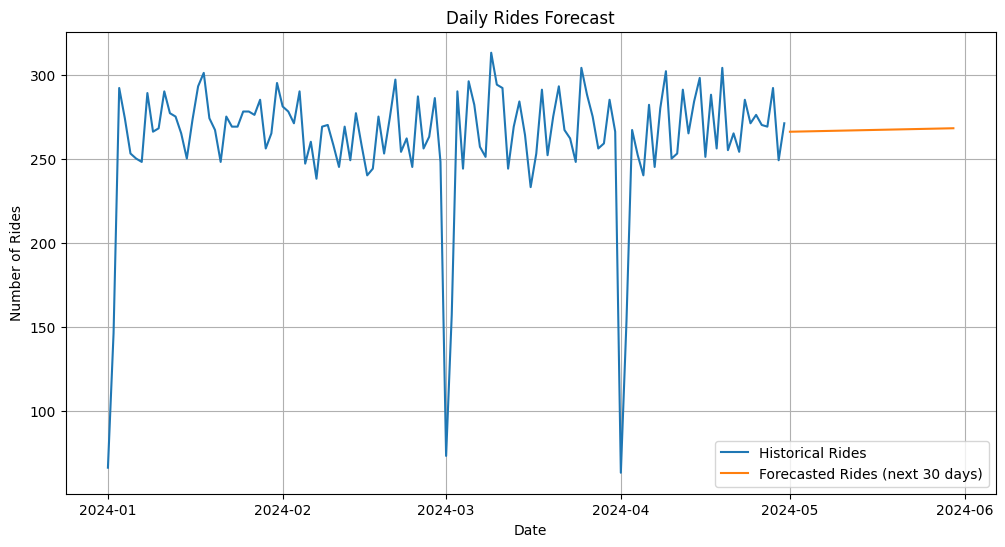

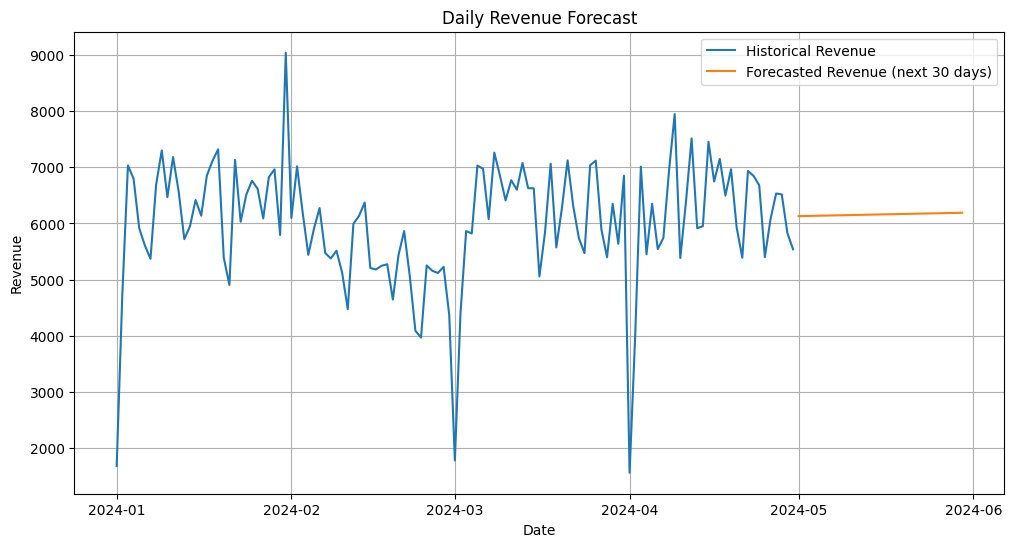

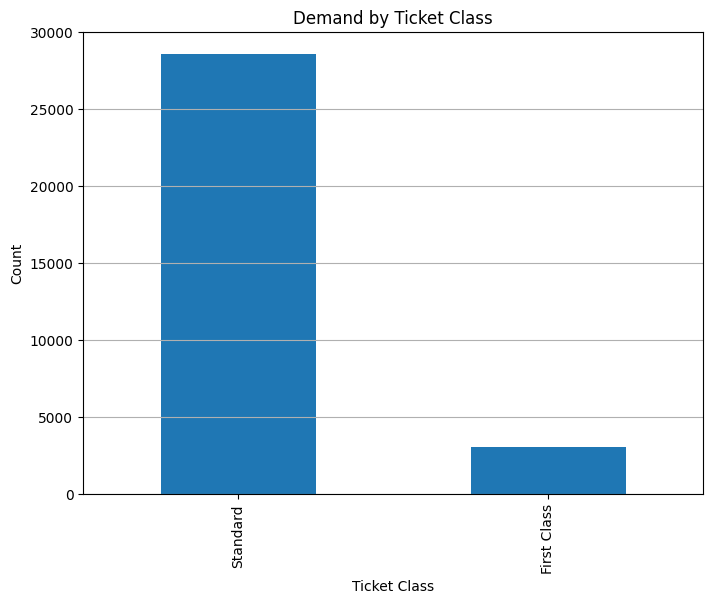

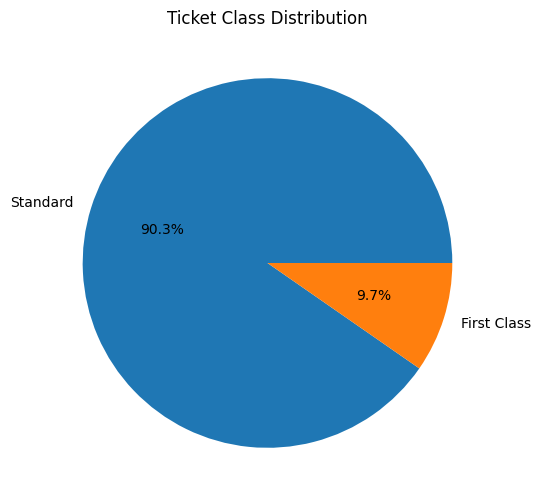

In [ ]:
# 4) VISUALIZATION PLOTS

plt.figure(figsize=(12,6))
#Make a line graph, Rides against the dates
plt.plot(daily_rides["Date of Journey"], daily_rides["Rides"], label="Historical Rides")
#Make another line graph containing the Predicted Rides against the dates
plt.plot(forecast_rides_df["Date"], forecast_rides_df["Predicted Rides"], label="Forecasted Rides (next 30 days)")
plt.title("Daily Rides Forecast")
plt.xlabel("Date")
plt.ylabel("Number of Rides")
plt.legend()
plt.grid(True)
plt.show()
print()

plt.figure(figsize=(12,6))
#Make a line graph, Revenue against dates
plt.plot(daily_revenue["Date of Journey"], daily_revenue["Revenue"], label="Historical Revenue")
#Make another line graph containing the Predicted Revenue against the dates
plt.plot(forecast_revenue_df["Date"], forecast_revenue_df["Predicted Revenue"], label="Forecasted Revenue (next 30 days)")
plt.title("Daily Revenue Forecast")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.legend()
plt.grid(True)
plt.show()
print()

plt.figure(figsize=(8,6))
ticket_class_counts.plot(kind='bar')
#Comparing demand for Ticket classes by count on bar chart
plt.title("Demand by Ticket Class")
plt.xlabel("Ticket Class")
plt.ylabel("Count")
plt.grid(axis='y')
plt.show()
print()

plt.figure(figsize=(6,6))
#Comapring demand for Ticket classes by percentage on pie chart
ticket_class_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title("Ticket Class Distribution")
plt.ylabel("")
plt.show()
